<a href="https://colab.research.google.com/github/JedWojtowicz/MAD_SWPS_Jedrzej_Wojtowicz_3/blob/main/MAD_JW_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pobieranie danych oraz instalacja bibliotek


In [81]:
import pandas as pd
url = "https://raw.githubusercontent.com/JedWojtowicz/MAD_SWPS_Jedrzej_Wojtowicz_3/refs/heads/main/Laptop_price.csv"

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [83]:
laptop = pd.read_csv(url, on_bad_lines='skip')

In [84]:
display(laptop.head(10))

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


# Opis projektu

W tym projekcie chciałbym zbadać jak podzespoły użyte w produkcji danego urządzenia wpływają na jego cenę. Utworzenie takiego modelu może pomagać przy wycenianiu przyszłych laptopów oraz pomagać konsumentom porównywać jakości ceny do jakości oferowanych produktów podczas rozważania zakupów.


Zmienna zależna:
- Cena

Zmienne niezależne:
- Prędkość procesora
- Rozmiar pamięci RAM
- Dostępna pamięć
- Rozmiar ekranu
- Waga
- Producent

Baza danych z serwisu kaggle zawierająca informacje o producencie, szybkości procesora, rozmiarze pamięci RAM, dostępnej pamięci, rozmiarze ekranu, wadze oraz cenie: https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction

# **Eksploracja danych**

In [85]:
laptop.dtypes

,0
Brand,object
Processor_Speed,float64
RAM_Size,int64
Storage_Capacity,int64
Screen_Size,float64
Weight,float64
Price,float64


In [86]:
laptop.dtypes.value_counts()

,count
float64,4
int64,2
object,1


In [87]:
col: pd.Series = laptop['Price']
col

,Price
0,17395.093065
1,31607.605919
2,9291.023542
3,17436.728334
4,32917.990718
...,...
995,31593.668017
996,9149.521832
997,16552.404779
998,9407.473459


In [88]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [89]:
laptop.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [90]:
laptop_num = laptop.drop(columns='Brand')
laptop_num

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,3.830296,16,512,11.185147,2.641094,17395.093065
1,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3.241627,4,256,11.853023,2.029061,9291.023542
3,3.806248,16,512,12.280360,4.573865,17436.728334
4,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2.780555,8,256,12.679356,3.750265,9149.521832
997,3.200569,4,512,12.666315,3.392612,16552.404779
998,1.604182,8,256,11.215581,3.857613,9407.473459


In [91]:
def compare_distributions(df_1, bins=10):

    for feature in df_1.columns:

        df_1[feature].hist(bins=bins, figsize=(6, 4), alpha=0.3, density=True, color='g')
        df_1[feature].plot.density(color='g')
        plt.title(feature)
        plt.show()

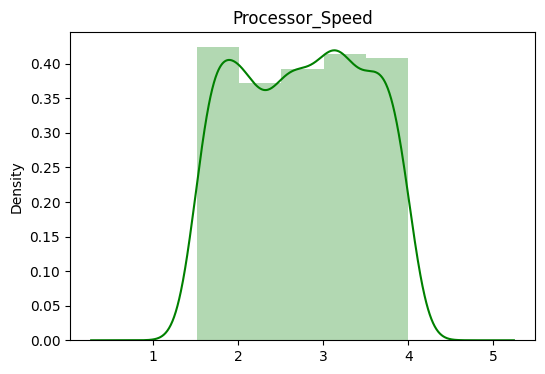

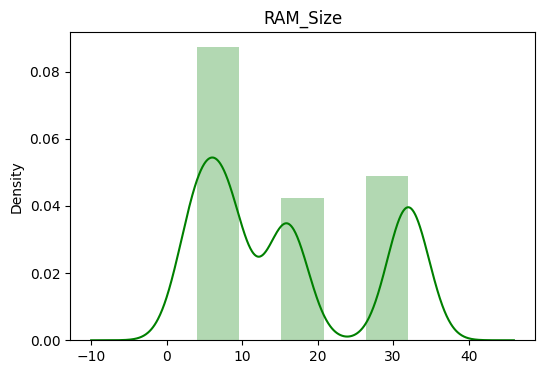

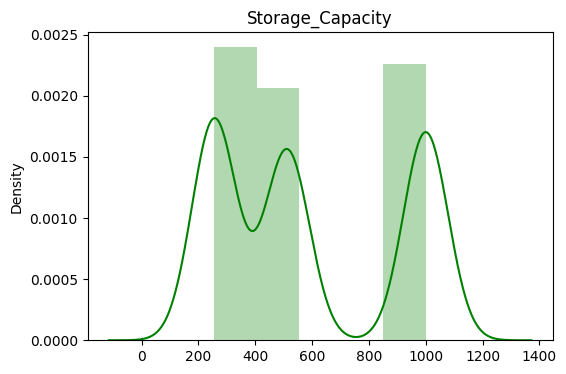

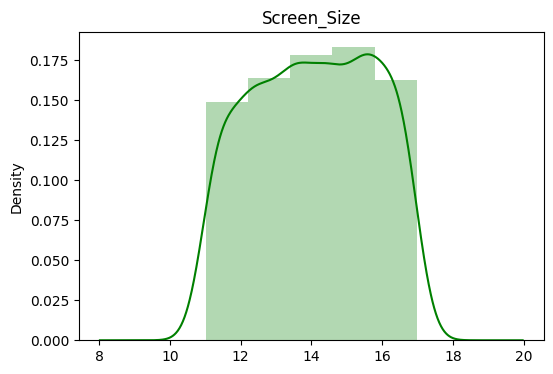

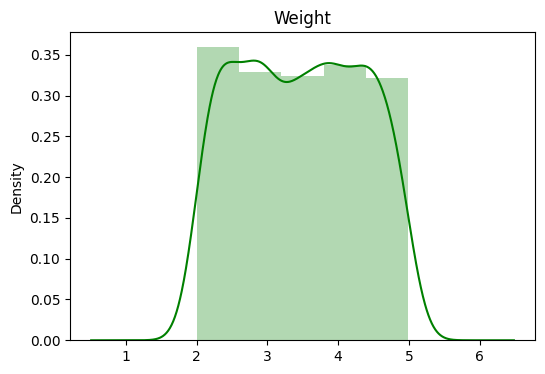

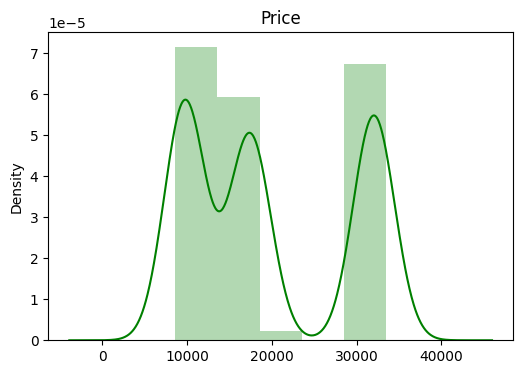

In [92]:
bins = 5
compare_distributions(laptop_num, bins)

                  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed          1.000000  0.021391         -0.067576    -0.013425   
RAM_Size                 0.021391  1.000000          0.002111    -0.036002   
Storage_Capacity        -0.067576  0.002111          1.000000    -0.027560   
Screen_Size             -0.013425 -0.036002         -0.027560     1.000000   
Weight                  -0.054603 -0.025382          0.041335     0.021995   
Price                   -0.050737  0.061237          0.997908    -0.026740   

                    Weight     Price  
Processor_Speed  -0.054603 -0.050737  
RAM_Size         -0.025382  0.061237  
Storage_Capacity  0.041335  0.997908  
Screen_Size       0.021995 -0.026740  
Weight            1.000000  0.038417  
Price             0.038417  1.000000  


<Axes: >

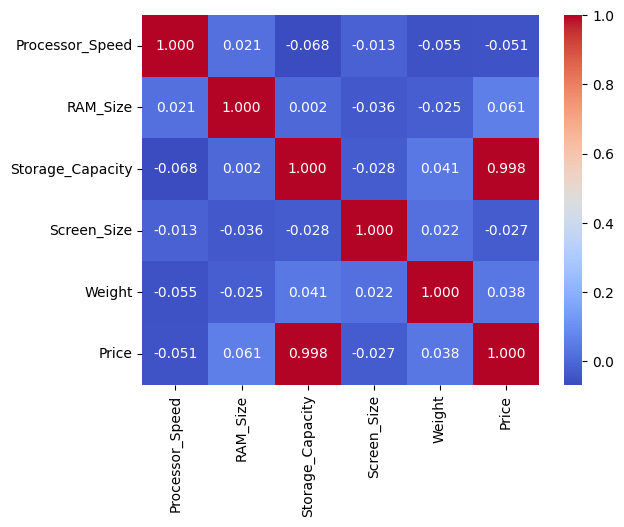

In [93]:
df_cor = laptop_num.corr(method ='pearson', numeric_only=True)
print(df_cor)
sns.heatmap(df_cor, annot=True, cmap='coolwarm', fmt=".3f")

In [94]:
def compare_boxplot(df_1):

    for feature in df_1.columns:

        sns.boxplot(x=df_1[feature])
        plt.show()

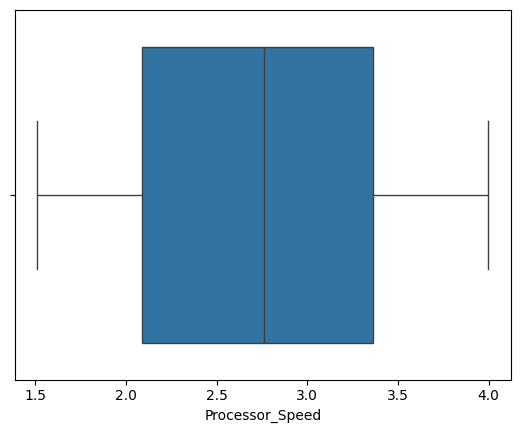

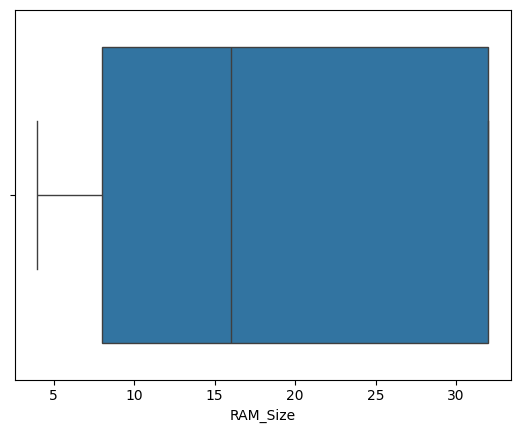

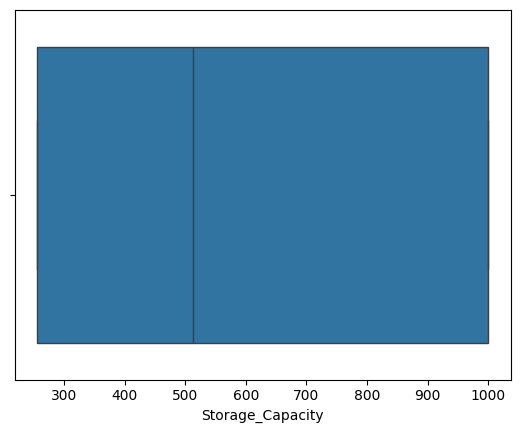

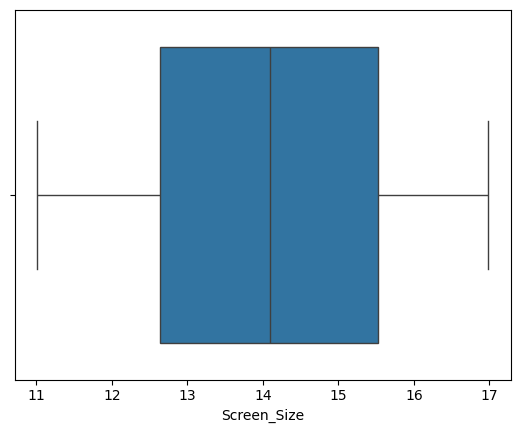

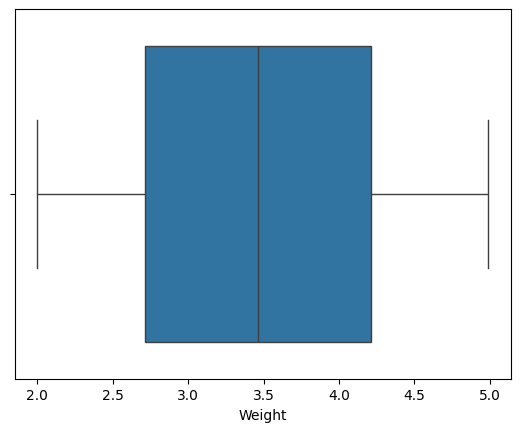

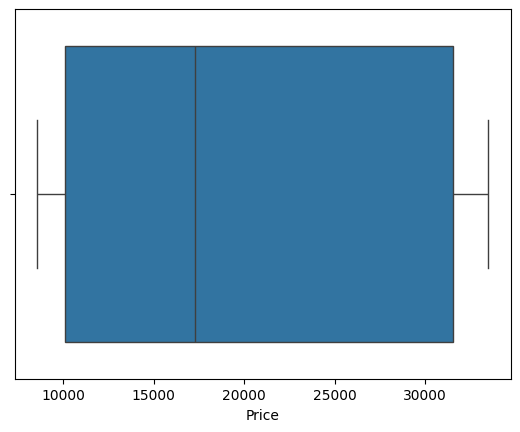

In [95]:
compare_boxplot(laptop_num)

# Oczyszczanie danych

In [96]:
laptop.isna().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


In [97]:
laptop.duplicated().replace(True, 1).sum()

np.int64(0)

In [98]:
z_scores = np.abs(stats.zscore(laptop_num))
outliers = (z_scores > 2)
outliers_count = (outliers == True).sum()
outliers_count

np.int64(0)

Z uwagi na brak wartości null, powtarzających się wartości oraz brak wartości odstających według metody Z-score oczyszczanie danych nie jest potrzebne

# Przygotowanie cech

In [99]:
label_encoder = LabelEncoder()
laptop['Brand_Encoded'] = label_encoder.fit_transform(laptop['Brand'])
laptop_prep = laptop.drop(columns=['Brand'])
laptop_prep

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Encoded
0,3.830296,16,512,11.185147,2.641094,17395.093065,1
1,2.912833,4,1000,11.311372,3.260012,31607.605919,0
2,3.241627,4,256,11.853023,2.029061,9291.023542,4
3,3.806248,16,512,12.280360,4.573865,17436.728334,0
4,3.268097,32,1000,14.990877,4.193472,32917.990718,0
...,...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017,3
996,2.780555,8,256,12.679356,3.750265,9149.521832,2
997,3.200569,4,512,12.666315,3.392612,16552.404779,2
998,1.604182,8,256,11.215581,3.857613,9407.473459,1


In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(laptop_prep.drop(columns=['Price']))

Standaryzacja danych

In [101]:
X = pd.DataFrame(X_scaled, columns = laptop_prep.drop(columns=['Price']).columns)
y = laptop_prep['Price']

In [102]:
X

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Brand_Encoded
0,1.476128,0.045524,-0.231664,-1.684219,-0.953490,-0.681111
1,0.221788,-1.047057,1.326040,-1.610189,-0.238893,-1.393570
2,0.671310,-1.047057,-1.048819,-1.292510,-1.660138,1.456266
3,1.443251,0.045524,-0.231664,-1.041877,1.278069,-1.393570
4,0.707499,1.502299,1.326040,0.547843,0.838871,-1.393570
...,...,...,...,...,...,...
995,0.810704,-1.047057,1.326040,-0.861977,-0.351596,0.743807
996,0.040939,-0.682863,-1.048819,-0.807865,0.327148,0.031348
997,0.615176,-1.047057,-0.231664,-0.815514,-0.085795,0.031348
998,-1.567379,-0.682863,-1.048819,-1.666370,0.451091,-0.681111


In [103]:
y

,Price
0,17395.093065
1,31607.605919
2,9291.023542
3,17436.728334
4,32917.990718
...,...
995,31593.668017
996,9149.521832
997,16552.404779
998,9407.473459


In [104]:
variance = laptop_prep.var(numeric_only=True)
print("Wariancja cech numerycznych:")
print(variance)

Wariancja cech numerycznych:
Processor_Speed     5.355258e-01
RAM_Size            1.207508e+02
Storage_Capacity    9.824370e+04
Screen_Size         2.910033e+00
Weight              7.508940e-01
Price               8.847406e+07
Brand_Encoded       1.972036e+00
dtype: float64


Pozbywanie się cech o niskiej wariancji

In [105]:
X = X.drop(columns=['Processor_Speed'])
X = X.drop(columns=['Weight'])

# Weryfikacja założeń

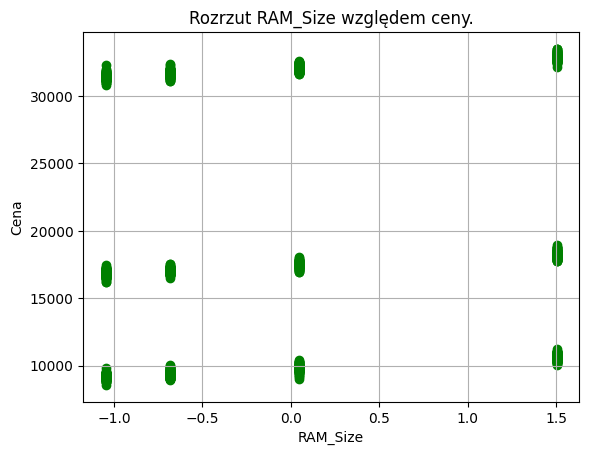

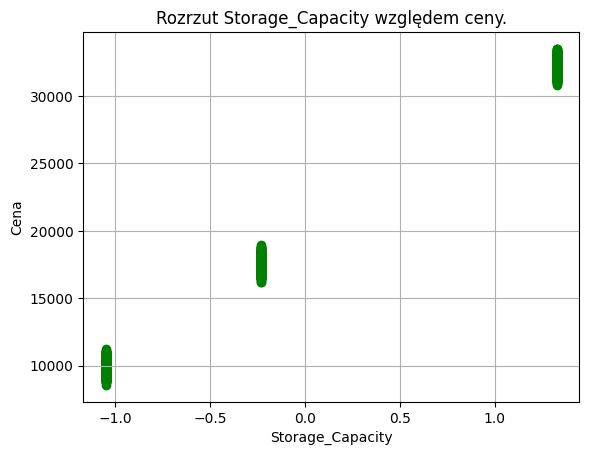

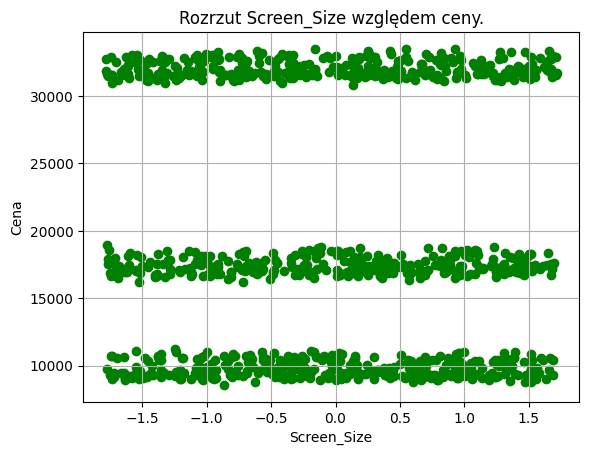

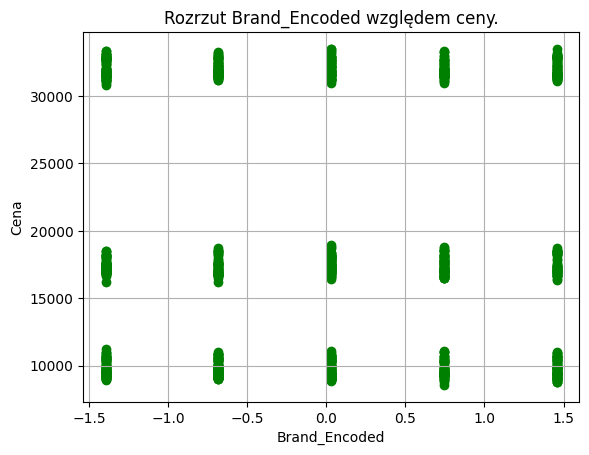

In [106]:
for feature in X.columns:
  values: np.ndarray = X[feature]
  plt.scatter(values, y, color='g')
  plt.xlabel(feature)
  plt.ylabel('Cena')
  plt.title(f'Rozrzut {feature} względem ceny.')
  plt.grid(True)
  plt.show()

In [107]:
X_const = sm.add_constant(X)

Model regresji na bazie metody najmniejszych kwadratów z biblliioteki statsmodels

In [108]:
model = sm.OLS(y, X_const).fit()

In [109]:
fitted_vals = model.fittedvalues
residuals = model.resid

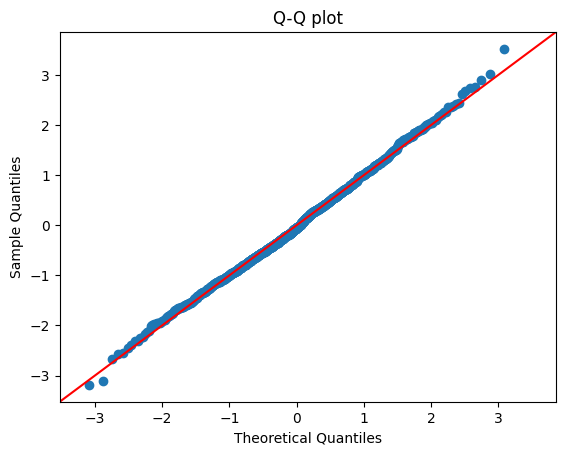

In [110]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q plot")
plt.show()

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.686e+05
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        07:56:52   Log-Likelihood:                -6916.6
No. Observations:                1000   AIC:                         1.384e+04
Df Residuals:                     995   BIC:                         1.387e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.96e+04      7.740   2533.001      0.000    1.96e+04    1.96e+04
RAM_Size           556.9931      7.745     71.915      0.000     541.794     572.192
Storage_Capacity  9381.1863      7.743   1211.605      0.000    9365.992    9396.380
Screen_Size         26.9324      7.751      3.475      0.001      11.722      42.143
Brand_Encoded       -8.7808      7.744     -1.134      0.257     -23.978       6.416
==============================================================================
Omnibus:                        3.281   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.301
Skew:                           0.140   Prob(JB):                        0.192
Kurtosis:                       2.965   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wpływ wszystkich zmiennych na model.

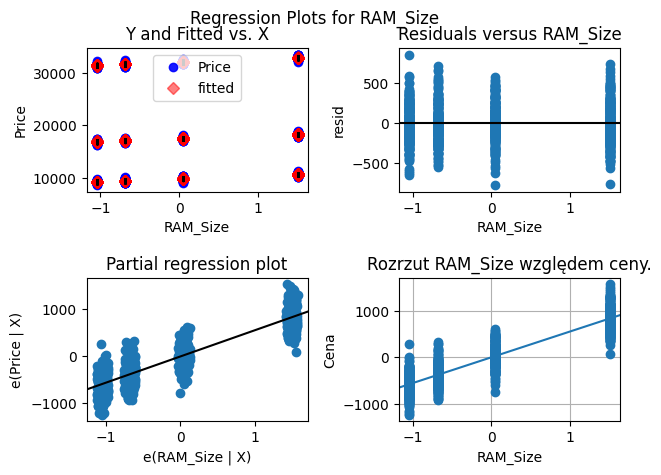

--------------------------------------------------


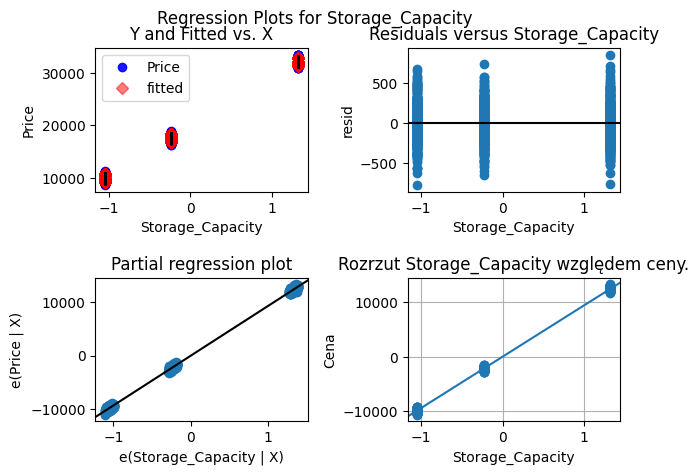

--------------------------------------------------


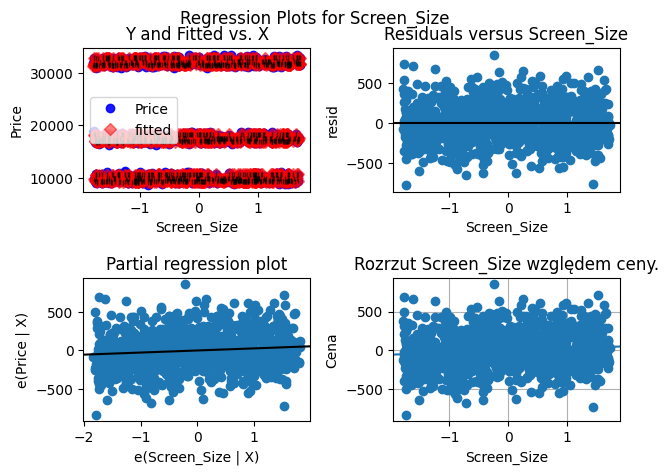

--------------------------------------------------


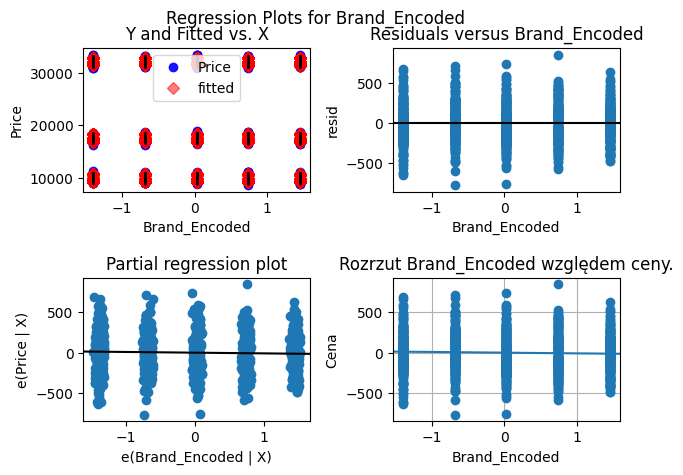

--------------------------------------------------


In [112]:
for feature in X.columns:
  values: np.ndarray = X[feature]
  sm.graphics.plot_regress_exog(model, feature)
  plt.ylabel('Cena')
  plt.title(f'Rozrzut {feature} względem ceny.')
  plt.grid(True)
  plt.show()
  print("--------------------------------------------------")

Sprawdzenie wielkolinearności (korelacji między zmiennymi niezależnymi)

In [113]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Współczynniki VIF:")
print(vif_data)

Współczynniki VIF:
            Feature       VIF
0          RAM_Size  1.001456
1  Storage_Capacity  1.000843
2       Screen_Size  1.003029
3     Brand_Encoded  1.001225


# Podział na zbiory

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Budowa modelu i ewaluacja

In [115]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

In [116]:
scores = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')

In [117]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Średni błąd bezwzględny (MAE):', mae)
print("Błąd średniokwadratowy (MSE):", mse)
print("Pierw. błędu średniokwadratowego (RMSE):", rmse)
print("Współczynnik determinacji R-kwadrat:", r2_score(y_test, predictions))
print("Średni determinacji R-kwadrat:", scores.mean())

Średni błąd bezwzględny (MAE): 195.47504890109522
Błąd średniokwadratowy (MSE): 57537.71869523189
Pierw. błędu średniokwadratowego (RMSE): 239.87021218824125
Współczynnik determinacji R-kwadrat: 0.9993283424282493
Średni determinacji R-kwadrat: 0.9993127880763847


In [118]:
laptop["Price"].mean() * 0.30

np.float64(5881.256388970026)

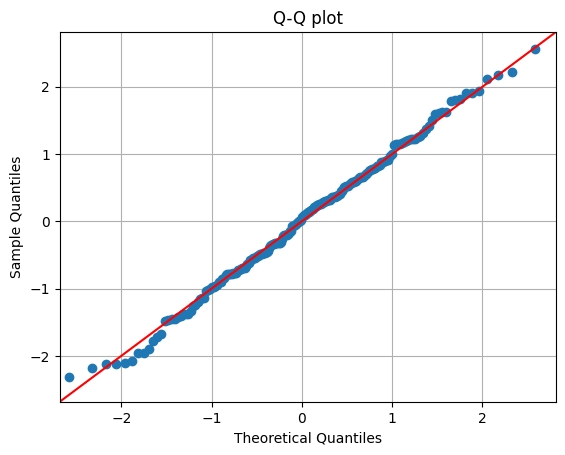

In [119]:
residuals = y_test - predictions
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q plot")
plt.grid(True)
plt.show()